# 결정 트리 decision tree
결정 트리 decision tree는 분류와 회귀 문제에 널리 사용하는 모델이다.

scikit-learn에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현되어 있다.   
scikit-learn은 사전 가지치기만 지원한다.

### 필요한 패키지를 import

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

### 유방암 자료

- sklearn 에서 제공하는 유방암 자료를 불러 읽어들인다.
- train data와 test data로 나눈다.

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

### Decision Tree모형의 생성

- DecisionTreeClassifier로 분류를 위한 결정트리를 생성한다.
- train dataset에서의 분류정확도와 test dataset에서의 분류정확도를 확인한다.

In [4]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937


### Overfitting의 해결
- max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분하다.

In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))


Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.951


### Decision Tree 시각화



In [6]:
from sklearn.tree import plot_tree

[Text(640.0588235294117, 489.24, 'worst radius <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]\nclass = benign'),
 Text(361.0588235294117, 380.52000000000004, 'worst concave points <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]\nclass = benign'),
 Text(196.94117647058823, 271.8, 'radius error <= 1.048\ngini = 0.031\nsamples = 252\nvalue = [4, 248]\nclass = benign'),
 Text(131.2941176470588, 163.08000000000004, 'smoothness error <= 0.003\ngini = 0.024\nsamples = 251\nvalue = [3, 248]\nclass = benign'),
 Text(65.6470588235294, 54.360000000000014, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = benign'),
 Text(196.94117647058823, 54.360000000000014, 'gini = 0.016\nsamples = 247\nvalue = [2, 245]\nclass = benign'),
 Text(262.5882352941176, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = malignant'),
 Text(525.1764705882352, 271.8, 'worst texture <= 25.62\ngini = 0.451\nsamples = 32\nvalue = [21, 11]\nclass = malignant'),
 Text(393.882352941176

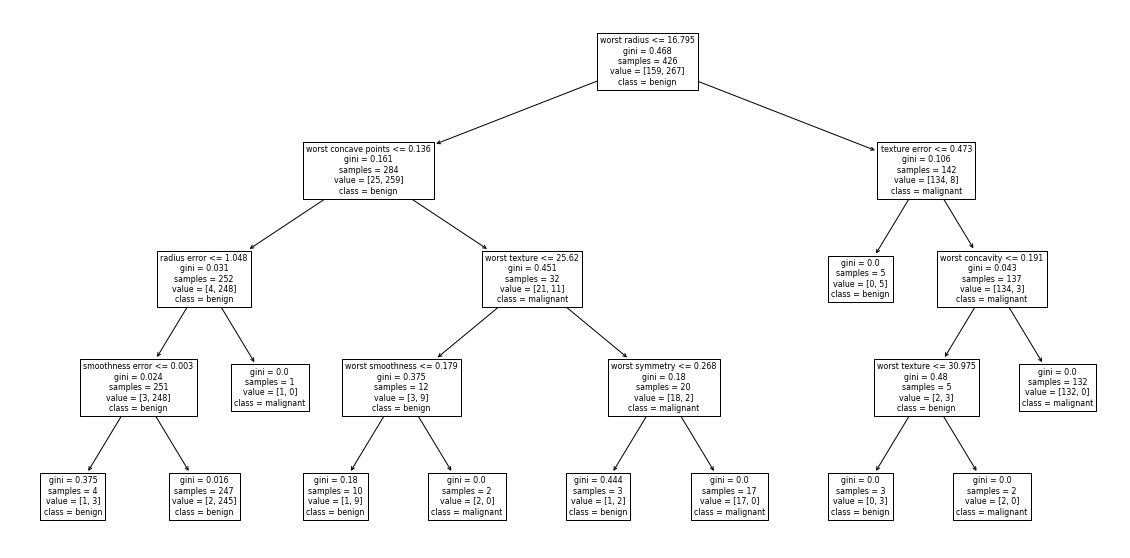

In [11]:
clf = tree.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, class_names=['malignant', 'benign'], feature_names=cancer.feature_names )

### 변수의 중요도

In [8]:
print("Feature Importances:\n{}".format(tree.feature_importances_))

Feature Importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


### 변수의 중요도를 시각화

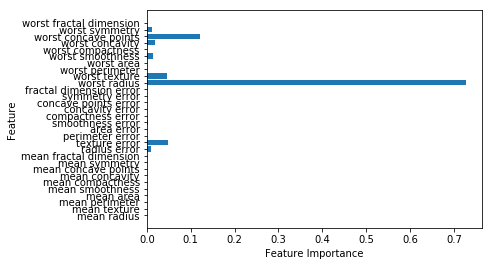

In [11]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()